# Assignment 1

(This text is copied in from the Course Handbook. Look through that for more context and __tips__!)

This assignment addresses three learning outcomes equally:
* LO1 - Program: Identify and deploy strategies for writing, understanding and managing computer programs using Python and version control
* LO2 - Data: The ability to wrangle, analyse, learn from and visualise a range of data, in a way that demonstrates its relevance to particular contexts of enquiry
* LO3 - Communicate: Communicate around socially relevant issues, supported by the use of multiple data sources and appropriate analysis.

You are asked to carry out a structured analysis on a dataset that has been provided. You will be given a template Notebook that you should fill out with code, which you will then submit. There may be some problems with the data you have been given (i.e. there are definitely problems, and you have to fix them). You are given 3 files:
* This template Notebook to fill in
* The original dataset (restaurant_data.csv)
* A re-ordered version of the data that you can use to check your analysis still works even if the data appears in a different order (restaurant_data_reordered.csv). You will be marked on this!

## Submission
Your submission is a single Jupyter Notebook, submitted through Learn. You should stick to the original structure, putting your code into the code boxes (and creating new code boxes as necessary). Placeholders in the original file such asl “I found these strange things” should be replaced with the strange things that you actually found when doing your analysis.

Your notebook:
* Must be entirely stand-alone - it should assume that the data file is in the same directory, but cannot use any additional data. 
* Must only use modules available on the Edina Notebook server
* Must be submitted with  all of output from the calculations included
* Must work if we press “Clear all output” and then “Run all cells” - CHECK THIS BEFORE HANDING IN!
* Must also work with the re-ordered dataset, without changing any code (this checks that you are working with the values of data, not its location in the file.)

# Setup

In [4]:
# Necessary import
import pandas as pd

First, load the data, from the supplied data file

In [45]:
# Read in the data
import pandas as pd
data = pd.read_csv(r"restaurant_data.csv")


# At the end, you'll need to retry this with the re-ordered version by uncommenting these lines:
# data = pd.read_csv("restaurant_data_reordered.csv")

# Have a look at it
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# Cleaning

The data had some some strange things in. Write down all of the strange things that you found here:

### I found the following strange things:
* Strange thing 1
1.The number in row140 is 9999 and in row168 is negative number. These are dirty data.
2.There are some 'Lady' in the sex column, which should be 'Female'.
3.There are some 'Man' in the sex column, which should be 'Male'.
4.There are some 'Thursday' in the day column, which should be 'Thur'.

Now, clean the data. Use a separate cell for each operation, and use a text cell to explain _why_ you are doing each operation

First, I am removing all of the 'X' from the data. This is because 'Y'

In [49]:
# Cleaning code goes in here
data = data[data['total_bill'] != 9999]
data = data[data['total_bill'] >0]
data.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Man,No,Sat,Dinner,3
240,27.18,2.00,Lady,Yes,Sat,Dinner,2
241,22.67,2.00,Man,Yes,Sat,Dinner,2
242,17.82,1.75,Man,No,Sat,Dinner,2
243,18.78,3.00,Lady,No,Thur,Dinner,2


Next, I am changing all of the P to Q

In [7]:
# More cleaning code goes in here
data.loc[data['sex']=='Lady','sex']='Female'
data.loc[data['sex']=='Man','sex']='Male'
data.loc[data['day']=='Thursday','day']='Thur'
data.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


Now that your data is clean, use some assert statements to check that it fits your picture of how the data should be. Make sure each assert explains why it is there. You should have several asserts, for all of the things that you found in the data that were strange.

In [8]:
#assert 3 > 2, "Larger numbers should be greater than smaller numbers" 
#assert 2 > 3, "This assert should fail - take it out of your notebook"
assert 3>2

# Simple Statistical Questions
For each of these, we want a command that just prints the relevant answer. The first one has been filled out as an example

How many rows are in the dataset after cleaning?

In [9]:
data.shape[0] 
# Simply count the number of rows using shape, and select the first element

242

What is the total amount of money given in tips?

In [10]:
data['tip'].sum()

727.3399999999999

How many people are in the largest group?

In [11]:
data['size'].max()

6

Count how many of the bills were paid by males, and how many were paid by females

In [12]:
data.loc[:,'sex'].value_counts()

Male      155
Female     87
Name: sex, dtype: int64

What was the larges amount of money given as a tip?

In [13]:
data['tip'].max()

10.0

What day of the week was the largest tip given on?

In [14]:
series = data.groupby(['day'])['tip'].sum()
print ('The largest tip is given on',series.idxmax() ,',which is',series[series.idxmax()])

The largest tip is given on Sat ,which is 260.4


Add a column with the proportion of the bill given as in your DataFrame (e.g. if the meal cost £10 and the tip was £2.5, the column would contain 0.25).
What is the average proportion of the bill that people add as a tip? 

In [15]:
data['proportion']=data['tip']/data['total_bill']
print ('The average proportion of the bill that people add as a tip is',data['proportion'].mean())

The average proportion of the bill that people add as a tip is 0.16116913278086523


Looking at the average proportion of each meal given as a tip, are males or females more generous? Which group gives a larger proportion on average, and what is the difference?

In [16]:
sex_tip = data.groupby(['sex'])['tip'].mean()
print(sex_tip.idxmax(),'are more generous.','The difference is',sex_tip[sex_tip.idxmax]-sex_tip[sex_tip.idxmin],'.')

Male are more generous. The difference is 0.2686807563959963 .


Do smokers tip more generously (a higher proportion of the bill) at lunchtime than at dinnertime?

In [17]:
data_smoker = data[data['smoker'] == 'Yes']
smoker_proportion = data_smoker.groupby(['time'])['proportion'].mean()
print (smoker_proportion)
if smoker_proportion.idxmax() == 'Lunch':
    print ('Yes.')
else:
    print('No.')

time
Dinner    0.160828
Lunch     0.172468
Name: proportion, dtype: float64
Yes.


Do smokers give more total money as tips at lunchtime or at dinnertime?

In [18]:
smoker_tip = data_smoker.groupby(['time'])['tip'].sum()
print (smoker_tip)
if smoker_tip.idxmax() == 'Dinner':
    print ('Smokers give more total money as tips at dinnertime.')
else:
    print ('Smokers give more total money as tips at lunchtime.')

time
Dinner    214.62
Lunch      63.19
Name: tip, dtype: float64
Smokers give more total money as tips at dinnertime.


# Graphs
For all these questions, create a graph, and explain what conclusions you draw from the graph using a text field.

What is the distribution of tips, and what is the distribution of total bills (plot on separate graphs). Hint: distplot

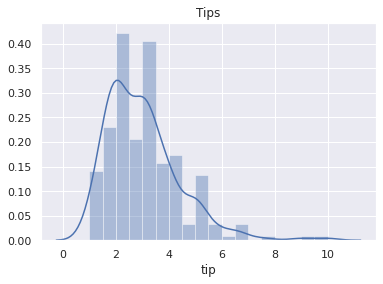

In [22]:
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline    
tips = sns.distplot(data['tip'])
tips.set_title('Tips')
plt.show()

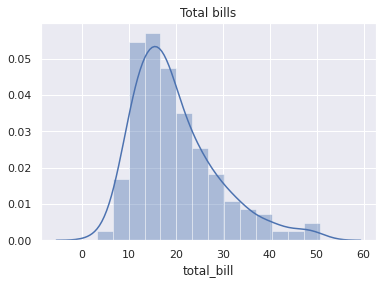

In [23]:
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline    
total_bills = sns.distplot(data['total_bill'])
total_bills.set_title('Total bills')
plt.show()

Now plot them on the *same* plot, and add a legend. Hint: use attribute 'label' to give them names, and call legend() on one of the plots to draw the legend

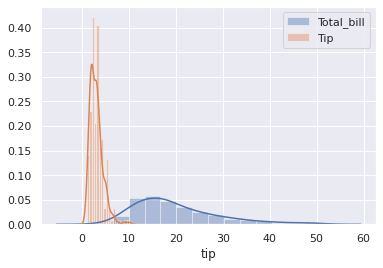

In [29]:
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline   

total_bills = data['total_bill']
sns.distplot(total_bills,label='Total_bill')

tips = data['tip']
sns.distplot(tips,label='Tip')


plt.legend(loc='upper right')
plt.show()

## Excercises

For all these questions, create a graph, and explain what conclusions you draw from the graph using a text field. It is not enough to just make the graph, you have to say what you are reading from it.

Do people give different average tips on different days? (Have you calculated this relative to the size of the bill, or just the tip amount?) Hint: boxplot

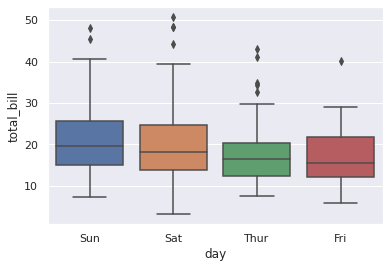

In [30]:
sns.boxplot(x='day',y='total_bill',data=data)
plt.show()

In [33]:
print('People five different average tips on different days. ','In sunday and saturday, the difference between extreme value is larger than usual, which means at that time there are more people come to consume.')

People five different average tips on different days.  In sunday and saturday, the difference between extreme value is larger than usual, which means at that time there are more people come to consume.


How does the size of the tip relate to the size of the bill? Hint: scatterplot, lmplot

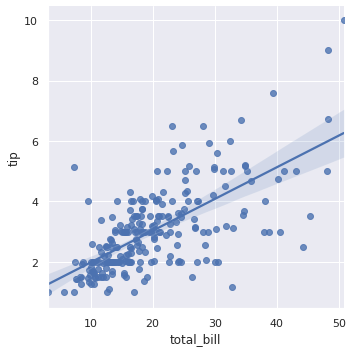

In [34]:
sns.lmplot(x="total_bill",y="tip",data=data)
plt.show()

In [35]:
print('The tip amount is positively related to the bill amount. As the amount increases, the tip generally increases proportionally.')

The tip amount is positively related to the bill amount. As the amount increases, the tip generally increases proportionally.


Does the proportion of the bill given as a tip relate to the number of people eating?

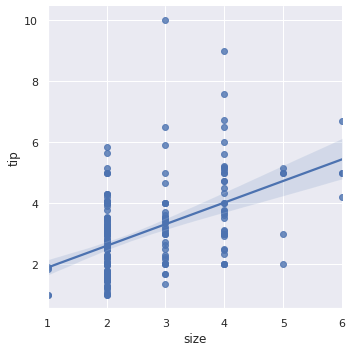

In [36]:
sns.lmplot(x="size",y="tip",data=data)
plt.show()

In [37]:
print('The more people, the higher tip proportion.')

The more people, the higher tip proportion.


Bonus Question: Create a boxplot showing total bills and tips for each day next to each other in a different colour. Do you see any patterns?

Hint: use melt (https://pandas.pydata.org/pandas-docs/stable/generated/pandas.melt.html) to reshape the data, so that you have new dataset, with a column for the day, a column for the amount, and a type column that says whether it is a total_bill or a tip. Then you can boxplot that, and use the type column to set the color.

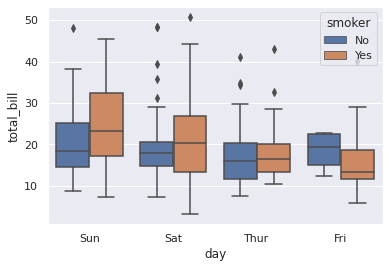

In [38]:
sns.boxplot(x='day',y='total_bill',hue='smoker',data=data)
plt.show()

# Open Question
Use 2 graphs and associated text to explain something else that you have found in the data. Try to relate it to causes, i.e. explain *why* the data might be this way. There is a lot you don't know, so it's OK to guess - think about what happens when people go to restaurants, and what might be a possible cause for what you see in the data.

In [39]:
print('On Saturdays and Sundays, there are more people who spend more money than usual, and there are more smokers. The reason may be that people are under pressure at work on weekdays, and they rely on cigarettes to eliminate their pressure on weekends.')

On Saturdays and Sundays, there are more people who spend more money than usual, and there are more smokers. The reason may be that people are under pressure at work on weekdays, and they rely on cigarettes to eliminate their pressure on weekends.


# Reflection
Write up to 100 words about your experience and what you have learnt. Which parts of the tools were useful, how can you relate what you've done in this assignment to your personal practice?

...

In [42]:
print('I learned the further application of seaborn and pandas from this exercise. Those algorithm function helps me to calculate and filter the collect data simple and fast. I can easily clean the valid data and draw the conclusions, For example, in this case, through seaborn visualization, it is clear to show the amount of consumption relates to the consumer group, time, and number of consumers. As for pandas, it contains high-level data structures and manipulation tools to make data analysis fast and easy. When the research subject needs to collect data in a wide range, there will always be some small problems in the data content, such as missing and not aligned with the truth . Through this function, all valid data can be quickly cleaned out and analyzed. These tools will be really helpful for me in future researches, in organizing and analyzing data to draw direct conclusions.')

I learned the further application of seaborn and pandas from this exercise. Those algorithm function helps me to calculate and filter the collect data simple and fast. I can easily clean the valid data and draw the conclusions, For example, in this case, through seaborn visualization, it is clear to show the amount of consumption relates to the consumer group, time, and number of consumers. As for pandas, it contains high-level data structures and manipulation tools to make data analysis fast and easy. When the research subject needs to collect data in a wide range, there will always be some small problems in the data content, such as missing and not aligned with the truth . Through this function, all valid data can be quickly cleaned out and analyzed. These tools will be really helpful for me in future researches, in organizing and analyzing data to draw direct conclusions.
